# Práctica 4: Tarea de clasificación

## Dataset

### Atributos

    - FL_DATE: Fecha del vuelo
    - OP_CARRIER: Identificador de la aerolínea
    - OP_CARRIER_FL_NUM: Número de vuelo
    - ORIGIN: Código del aeropuerto de origen
    - DEST: Código del aeropuerto de destino
    - CRS_DEP_TIME: Hora planeada de salida
    - DEP_TIME: Hora actual de salida
    - DEP_DELAY: Retraso en la salida en minutos
    - TAXI_OUT: El tiempo transcurrido entre la salida desde el aeropuerto de origen y el atributo "WHEELS_OFF"
    - WHEELS_OFF: Hora a la que las llantas del avión dejaron de tocar el suelo
    - CRS_ARR_TIME: Hora planeada de llegada
    - ARR_DELAY: Retraso total en la llegada en minutos (atributo a predecir)
    - CRS_ELAPSED_TIME: Tiempo total planeado del vuelo
    - DISTANCE: Distancia entre los dos aeropuertos

# Análisis exploratorio

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [45]:
trn_airdt = pd.read_csv('train_airlines_delay_challenge.csv')
airlin_df = pd.DataFrame(trn_airdt)
airlin_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [46]:
print(airlin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB
None


In [47]:
print(airlin_df.describe())

       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean        2.245577e+03  1.326138e+03  1.332794e+03  8.889274e+00   
std         1.877307e+03  4.730146e+02  4.856179e+02  3.604610e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -2.340000e+02   
25%         6.970000e+02  9.230000e+02  9.250000e+02 -5.000000e+00   
50%         1.684000e+03  1.320000e+03  1.327000e+03 -2.000000e+00   
75%         3.467000e+03  1.725000e+03  1.733000e+03  7.000000e+00   
max         9.320000e+03  2.359000e+03  2.400000e+03  1.805000e+03   

           TAXI_OUT    WHEELS_OFF  CRS_ARR_TIME     ARR_DELAY  \
count  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean   1.581331e+01  1.355605e+03  1.495601e+03  4.658041e+00   
std    9.185871e+00  4.869539e+02  4.932537e+02  3.852880e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00 -2.380000e+02   
25%    1.000000e+01  9.390000e+02  1.115000e

In [48]:
airlin_df.shape

(9000000, 14)

In [53]:
print(airlin_df['OP_CARRIER'].value_counts())

OP_CARRIER
WN    1797926
DL    1161883
AA     964037
OO     911078
EV     741999
UA     705030
MQ     464337
US     432815
B6     363733
AS     237757
FL     195679
XE     173991
YV     134190
F9     131721
9E     126681
CO     118819
HA     111342
NK      71815
VX      63501
NW      45931
OH      45735
Name: count, dtype: int64


In [55]:
airlin_df.loc[airlin_df.duplicated()]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
932,2009-09-09,WN,635,PHX,CMH,945.0,954.0,9.0,8.0,1002.0,1625.0,6.0,220.0,1671.0
13937,2009-09-04,OO,4716,SLC,GTF,1056.0,1059.0,3.0,8.0,1107.0,1225.0,-7.0,89.0,463.0
16722,2009-09-26,FL,129,TPA,ATL,1840.0,1845.0,5.0,88.0,2013.0,2010.0,78.0,90.0,406.0
24106,2009-09-09,MQ,4631,RDU,DCA,1200.0,1153.0,-7.0,12.0,1205.0,1300.0,-8.0,60.0,227.0
25345,2009-09-19,9E,3846,FWA,DTW,645.0,638.0,-7.0,21.0,659.0,745.0,-9.0,60.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999736,2011-06-06,EV,5546,GSP,ATL,1523.0,1520.0,-3.0,10.0,1530.0,1625.0,-8.0,62.0,153.0
2999737,2011-06-12,WN,3296,STL,PHX,810.0,810.0,0.0,11.0,821.0,930.0,-1.0,200.0,1262.0
2999852,2011-06-12,AA,2255,OMA,DFW,1900.0,1856.0,-4.0,12.0,1908.0,2045.0,-9.0,105.0,583.0
2999887,2011-06-11,WN,3994,LAS,SMF,1040.0,1040.0,0.0,11.0,1051.0,1210.0,-12.0,90.0,397.0


### Valores nulos

In [57]:
nan_summary = airlin_df.isnull().sum()

print(nan_summary)

FL_DATE              0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
CRS_ARR_TIME         0
ARR_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64


No hay valores faltantes

## Valores duplicados

In [60]:
duplicados = airlin_df.duplicated().sum()
print(f" {duplicados} ")

 27522 


In [64]:
duplicated_rows = airlin_df[airlin_df.duplicated()]
print(duplicated_rows.head())

          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
932    2009-09-09         WN                635    PHX  CMH         945.0   
13937  2009-09-04         OO               4716    SLC  GTF        1056.0   
16722  2009-09-26         FL                129    TPA  ATL        1840.0   
24106  2009-09-09         MQ               4631    RDU  DCA        1200.0   
25345  2009-09-19         9E               3846    FWA  DTW         645.0   

       DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
932       954.0        9.0       8.0      1002.0        1625.0        6.0   
13937    1059.0        3.0       8.0      1107.0        1225.0       -7.0   
16722    1845.0        5.0      88.0      2013.0        2010.0       78.0   
24106    1153.0       -7.0      12.0      1205.0        1300.0       -8.0   
25345     638.0       -7.0      21.0       659.0         745.0       -9.0   

       CRS_ELAPSED_TIME  DISTANCE  
932               220.0    1671.0  
13

In [65]:
airlin_df_clean = airlin_df.drop_duplicates()

## Formato de fecha

Con el fin de obtener el día de la seman en el que se da el vuelo, esto ya que hay estudios que indican cuales vuelos son más importantes que otros según las llegadas en inicio de semana (Lunes), contra los de placer con llegadas en fin de semana (viernes).

In [67]:
airlin_df['FL_DATE'] = pd.to_datetime(airlin_df['FL_DATE'])

In [68]:
airlin_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [70]:
airlin_df.loc[0,'FL_DATE'].day_name()

'Saturday'

### Creación de nuevos parámetros

Como primer nuevo parámetro agregamos el día de la semana en el que se dá el vuelo

In [72]:
airlin_df['WEEK_DAY'] = airlin_df ['FL_DATE'].dt.day_name()

In [78]:
airlin_df['WEEK_DAY']

0           Saturday
1             Friday
2             Monday
3          Wednesday
4             Friday
             ...    
8999995       Friday
8999996       Friday
8999997       Sunday
8999998       Friday
8999999       Monday
Name: WEEK_DAY, Length: 9000000, dtype: object

In [80]:
print(airlin_df.describe())

                             FL_DATE  OP_CARRIER_FL_NUM  CRS_DEP_TIME  \
count                        9000000       9.000000e+06  9.000000e+06   
mean   2013-07-01 14:21:03.359999488       2.245577e+03  1.326138e+03   
min              2009-01-01 00:00:00       1.000000e+00  1.000000e+00   
25%              2011-04-04 00:00:00       6.970000e+02  9.230000e+02   
50%              2013-07-02 00:00:00       1.684000e+03  1.320000e+03   
75%              2015-09-30 00:00:00       3.467000e+03  1.725000e+03   
max              2017-12-31 00:00:00       9.320000e+03  2.359000e+03   
std                              NaN       1.877307e+03  4.730146e+02   

           DEP_TIME     DEP_DELAY      TAXI_OUT    WHEELS_OFF  CRS_ARR_TIME  \
count  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean   1.332794e+03  8.889274e+00  1.581331e+01  1.355605e+03  1.495601e+03   
min    1.000000e+00 -2.340000e+02  1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.250000e+02 -5.000

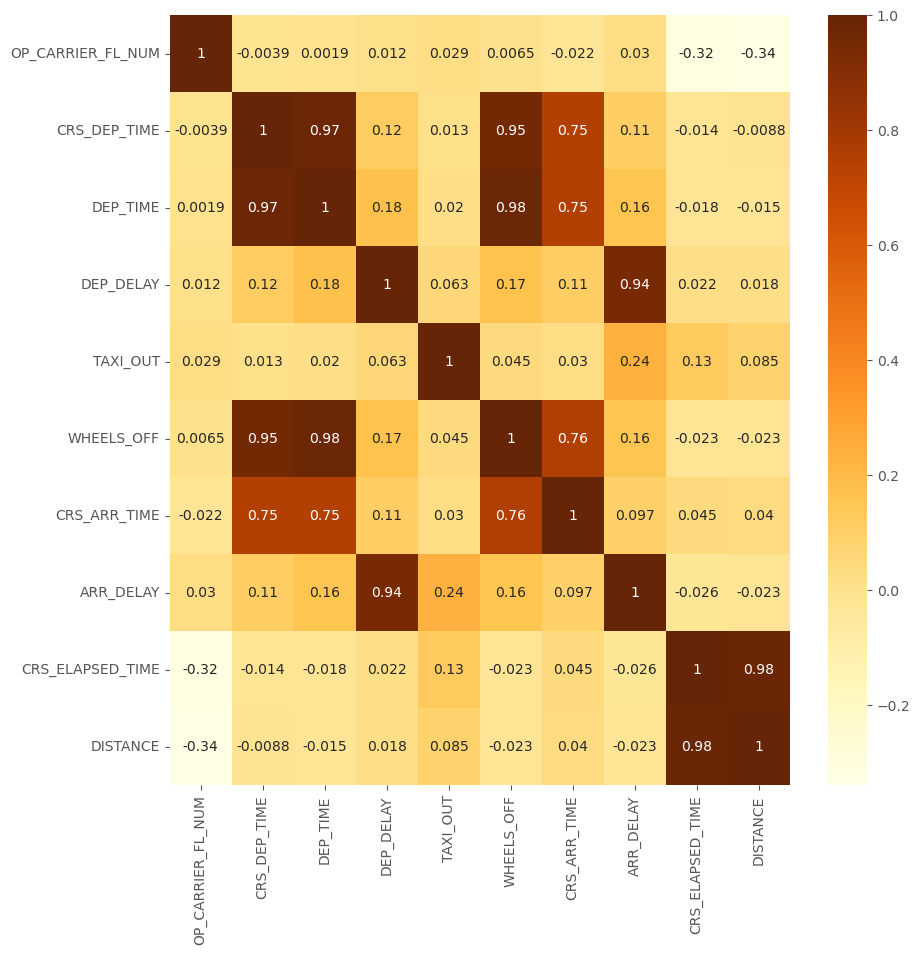

In [26]:
columnas_corr = ['OP_CARRIER_FL_NUM', 
                 'CRS_DEP_TIME','DEP_TIME','DEP_DELAY','TAXI_OUT',
                 'WHEELS_OFF','CRS_ARR_TIME','ARR_DELAY','CRS_ELAPSED_TIME', 
                 'DISTANCE']
corr_matrix = airlin_df[columnas_corr].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,cmap="YlOrBr", annot=True)
plt.show()

In [82]:
print(airlin_df['DEST'].value_counts())

DEST
ATL    583982
ORD    436100
DFW    372349
DEN    345011
LAX    319097
        ...  
AZA        18
PIE        18
CGI        11
SHD         9
UIN         7
Name: count, Length: 351, dtype: int64


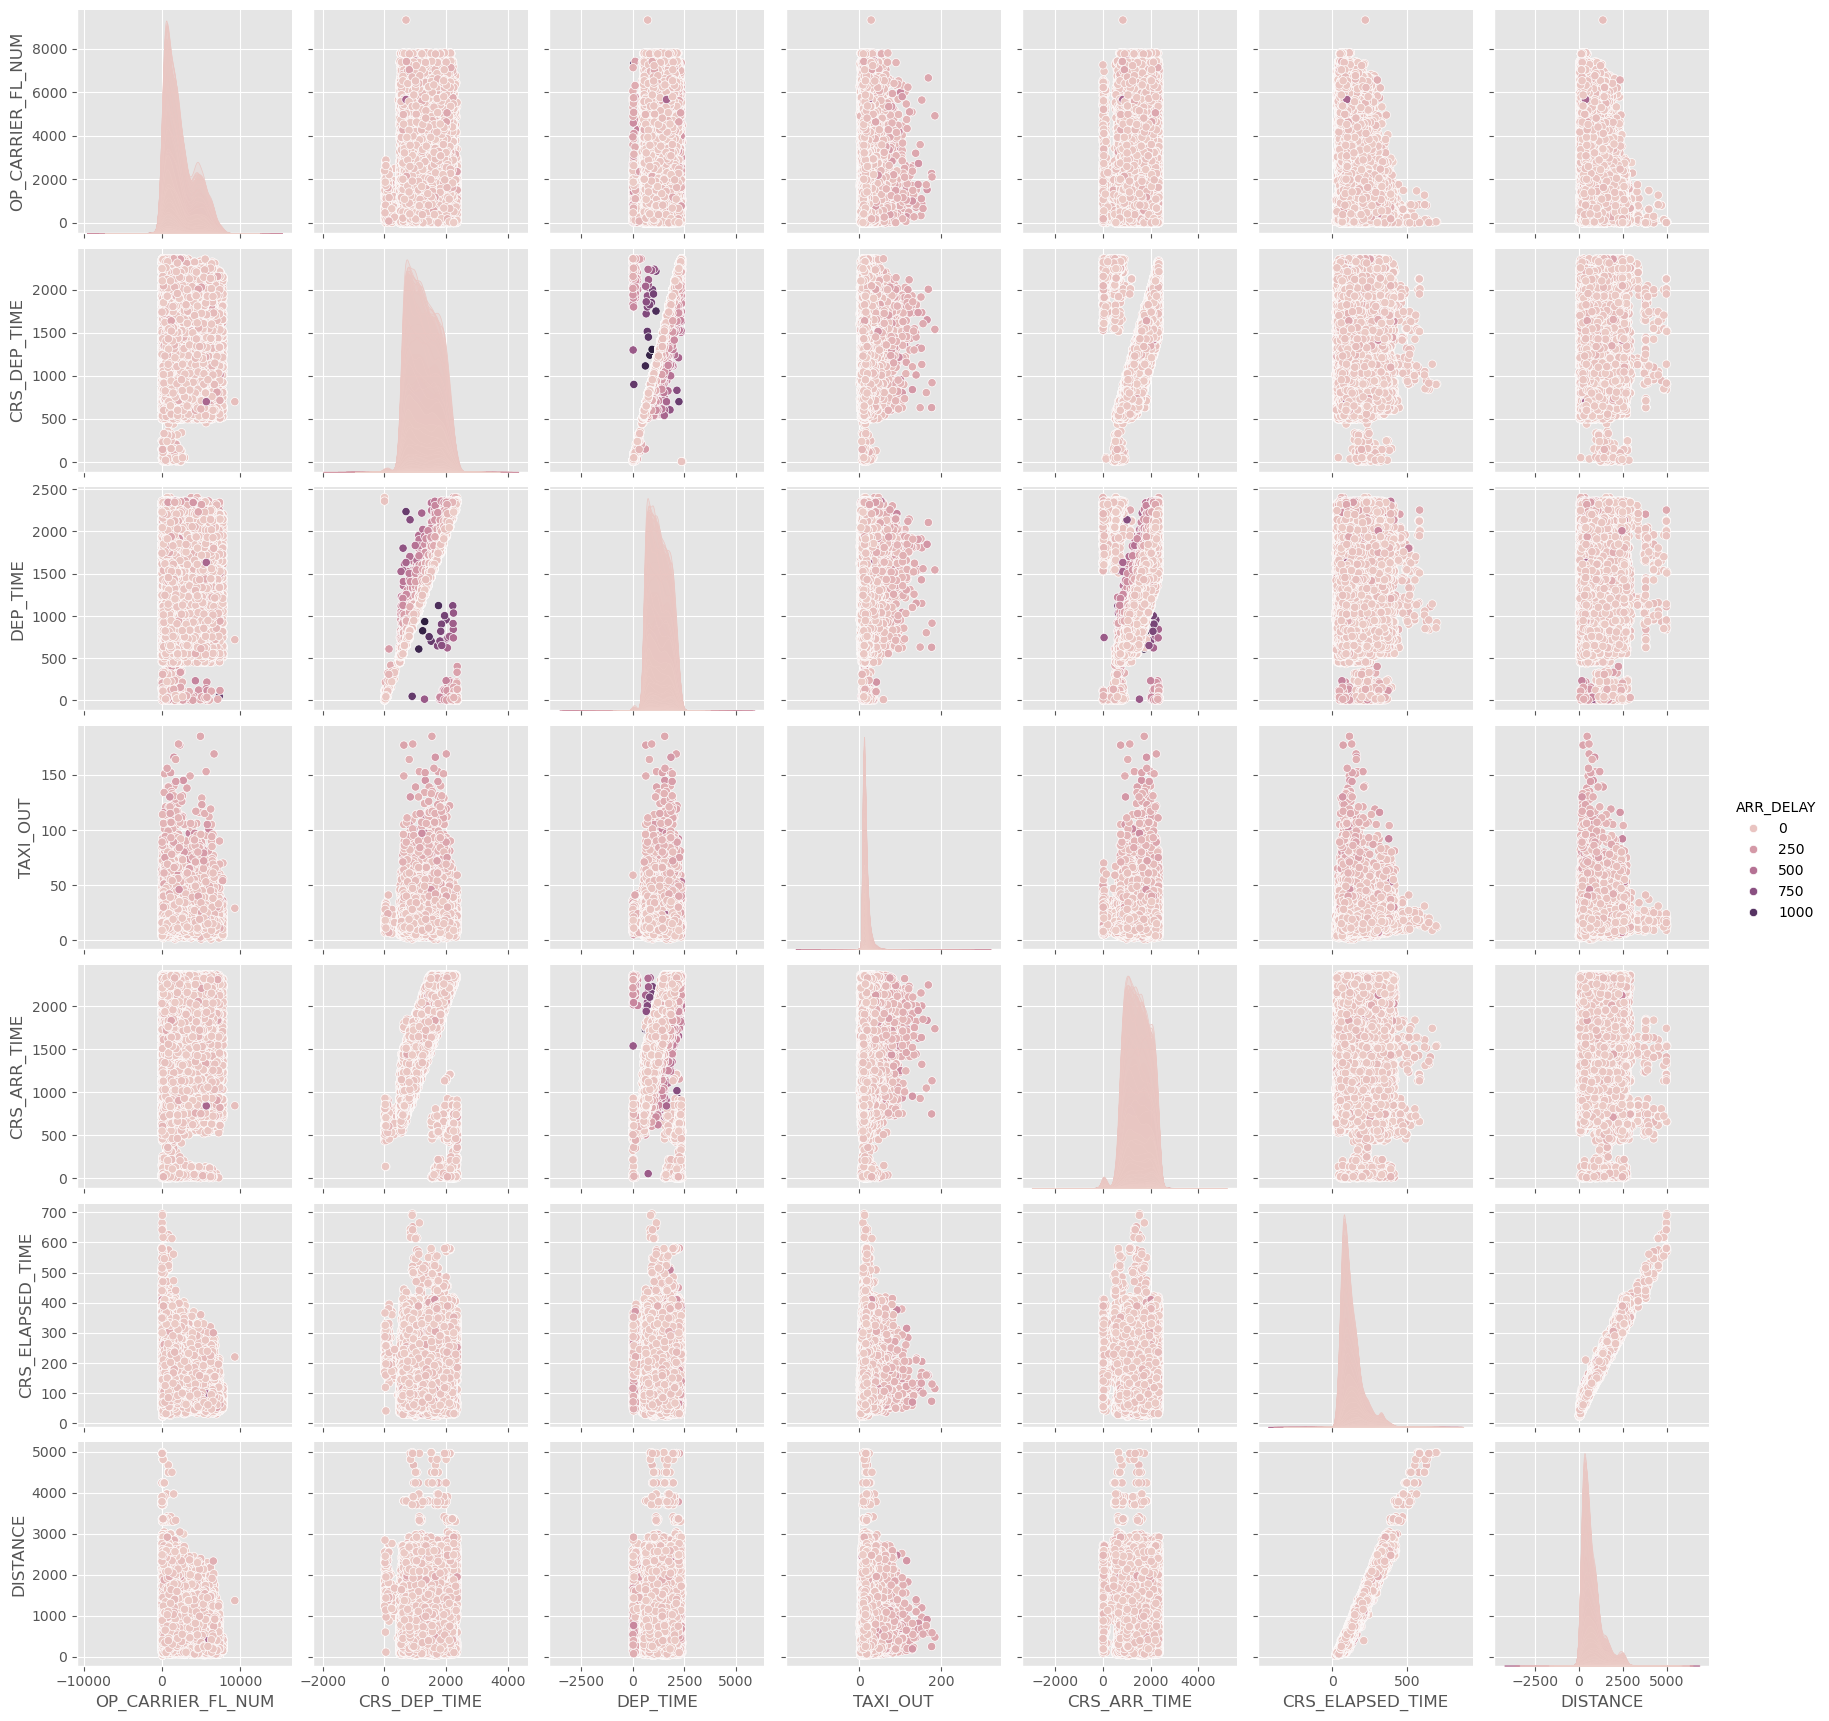

In [28]:
columnas_interes = ['OP_CARRIER_FL_NUM', 
                 'CRS_DEP_TIME','DEP_TIME','TAXI_OUT','CRS_ARR_TIME','CRS_ELAPSED_TIME', 
                 'DISTANCE']
sample_df = airlin_df.sample(n=100000, random_state=42)

sns.pairplot(sample_df, hue='ARR_DELAY', vars=columnas_interes)

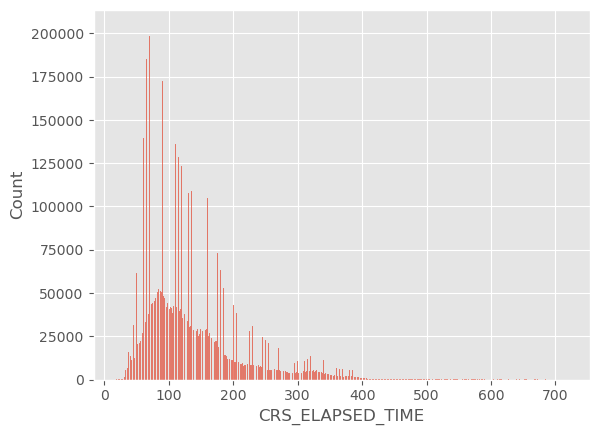

In [29]:
sns.histplot(airlin_df['CRS_ELAPSED_TIME'], bins=1000)
plt.show()

<Axes: ylabel='Frequency'>

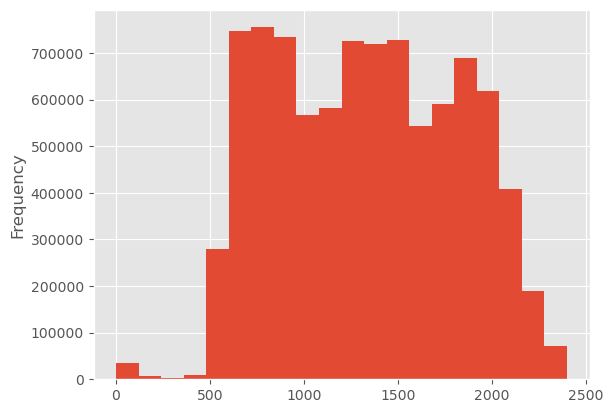

In [30]:
airlin_df['DEP_TIME'].plot(kind= 'hist', bins =20)

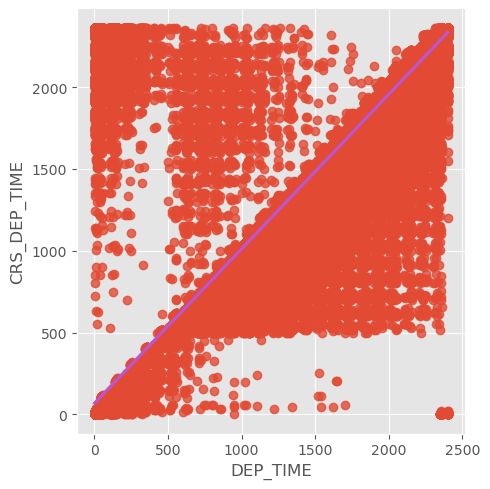

In [31]:
sns.lmplot(x='DEP_TIME', y = 'CRS_DEP_TIME', data = airlin_df, line_kws={'color': 'mediumorchid'})

## Categoricas a nominal

Frecuencia de la categoría
\
Asigno a cada categoría, OP_CARRIER, DEST y ORIGIN, un valor basado en la frecuencia con la que aparece en el dataset

In [84]:
airlin_df['ORIGIN_FREQ'] = airlin_df['ORIGIN'].map(airlin_df['ORIGIN'].value_counts(normalize=True))
airlin_df['DEST_FREQ'] = airlin_df['DEST'].map(airlin_df['DEST'].value_counts(normalize=True))

In [85]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,Saturday,0.012299,0.018806
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,Friday,0.027592,0.002916
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,Monday,0.004985,0.001861
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,Wednesday,0.035458,0.001450
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,Friday,0.024460,0.007895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,Friday,0.009151,0.007255
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,Friday,0.018792,0.007255
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,Sunday,0.038314,0.006870
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,Friday,0.013105,0.003725


In [88]:

airlin_df['OPCARR_FREQ'] = airlin_df['OP_CARRIER'].map(airlin_df['OP_CARRIER'].value_counts(normalize=True))

In [90]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ,OPCARR_FREQ
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,Saturday,0.012299,0.018806,0.107115
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,Friday,0.027592,0.002916,0.019332
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,Monday,0.004985,0.001861,0.005082
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,Wednesday,0.035458,0.001450,0.101231
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,Friday,0.024460,0.007895,0.199770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,Friday,0.009151,0.007255,0.199770
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,Friday,0.018792,0.007255,0.101231
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,Sunday,0.038314,0.006870,0.199770
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,Friday,0.013105,0.003725,0.026417


In [92]:
print(airlin_df['OPCARR_FREQ'].value_counts())

OPCARR_FREQ
0.199770    1797926
0.129098    1161883
0.107115     964037
0.101231     911078
0.082444     741999
0.078337     705030
0.051593     464337
0.048091     432815
0.040415     363733
0.026417     237757
0.021742     195679
0.019332     173991
0.014910     134190
0.014636     131721
0.014076     126681
0.013202     118819
0.012371     111342
0.007979      71815
0.007056      63501
0.005103      45931
0.005082      45735
Name: count, dtype: int64


In [94]:
print(airlin_df['WEEK_DAY'].value_counts())

WEEK_DAY
Thursday     1339867
Friday       1337976
Monday       1336816
Wednesday    1323819
Tuesday      1304284
Sunday       1263569
Saturday     1093669
Name: count, dtype: int64


### Modificamos el día de la semana de categórico a numérico

In [97]:
day_class_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
    
}


airlin_df['WEEK_DAY'] = airlin_df['WEEK_DAY'].map(day_class_mapping)

In [99]:
print(airlin_df['WEEK_DAY'].value_counts())

WEEK_DAY
4    1339867
5    1337976
1    1336816
3    1323819
2    1304284
7    1263569
6    1093669
Name: count, dtype: int64


In [101]:
airlin_df.to_csv('C:/Users/andyl/icd2024/procAirF.csv', index=False)

In [102]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ,OPCARR_FREQ
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,6,0.012299,0.018806,0.107115
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,5,0.027592,0.002916,0.019332
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,1,0.004985,0.001861,0.005082
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,3,0.035458,0.001450,0.101231
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,5,0.024460,0.007895,0.199770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,5,0.009151,0.007255,0.199770
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,5,0.018792,0.007255,0.101231
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,7,0.038314,0.006870,0.199770
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,5,0.013105,0.003725,0.026417


# Ratio entre distancia - tiempo

In [106]:
airlin_df['DISTANCE_TIME_RATIO'] = airlin_df['DISTANCE'] / airlin_df['CRS_ELAPSED_TIME']

In [108]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ,OPCARR_FREQ,DISTANCE_TIME_RATIO
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,6,0.012299,0.018806,0.107115,6.621053
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,5,0.027592,0.002916,0.019332,5.379032
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,1,0.004985,0.001861,0.005082,4.675926
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,3,0.035458,0.001450,0.101231,1.977778
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,5,0.024460,0.007895,0.199770,6.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,5,0.009151,0.007255,0.199770,5.635294
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,5,0.018792,0.007255,0.101231,5.000000
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,7,0.038314,0.006870,0.199770,6.042857
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,5,0.013105,0.003725,0.026417,7.137640


In [110]:
print(airlin_df['DISTANCE_TIME_RATIO'].value_counts())

DISTANCE_TIME_RATIO
4.600000    24983
5.000000    23344
6.000000    18133
4.000000    16016
4.493333    14556
            ...  
2.011364        1
7.634409        1
7.408922        1
6.017483        1
5.619883        1
Name: count, Length: 51788, dtype: int64


# Variable categorica para ARR_DELAY

In [113]:
import numpy as np


def categorize_arrival_delay(arr_delay):
    if arr_delay < -15:  # Early
        return 'Early'
    elif arr_delay > 15:  # Delay
        return 'Delay'
    else:  # On time
        return 'On time'


airlin_df['ARR_DELAY_CAT'] = airlin_df['ARR_DELAY'].apply(categorize_arrival_delay)

In [115]:
airlin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         float64       
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  CRS_ARR_TIME         float64       
 11  ARR_DELAY            float64       
 12  CRS_ELAPSED_TIME     float64       
 13  DISTANCE             float64       
 14  WEEK_DAY             int64         
 15  ORIGIN_FREQ          float64       
 16  DEST_FREQ            float64       
 17  OPCARR_FREQ          float64       
 18  DISTANCE_TIME_RATIO  float64       
 19  ARR_DELAY_CAT        

# PCA

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD


categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST', 'ARR_DELAY_CAT']
numeric_cols = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
                'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 
                'WEEK_DAY', 'ORIGIN_FREQ', 'DEST_FREQ', 'OPCARR_FREQ', 
                'DISTANCE_TIME_RATIO']

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  
        ('num', 'passthrough', numeric_cols)          
    ]
)

# Transformar los datos
X_transformed = preprocessor.fit_transform(airlin_df)

# Aplicar TruncatedSVD (PCA)
svd = TruncatedSVD(n_components=3)  # Cambia el número de componentes según sea necesario
X_reduced = svd.fit_transform(X_transformed)

# Ver las dimensiones del resultado
print("Dimensiones de X_reduced:", X_reduced.shape)

# Opcional: Convertir a DataFrame para una mejor visualización
pca_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())

Dimensiones de X_reduced: (9000000, 3)
           PC1         PC2         PC3
0  2637.119030  607.642844  -86.568450
1  4313.989327 -486.776349   41.988273
2  2944.805097 -277.038996   20.828732
3  1650.732566 -352.583930  -39.680244
4  2948.700458  418.936450 -273.337819


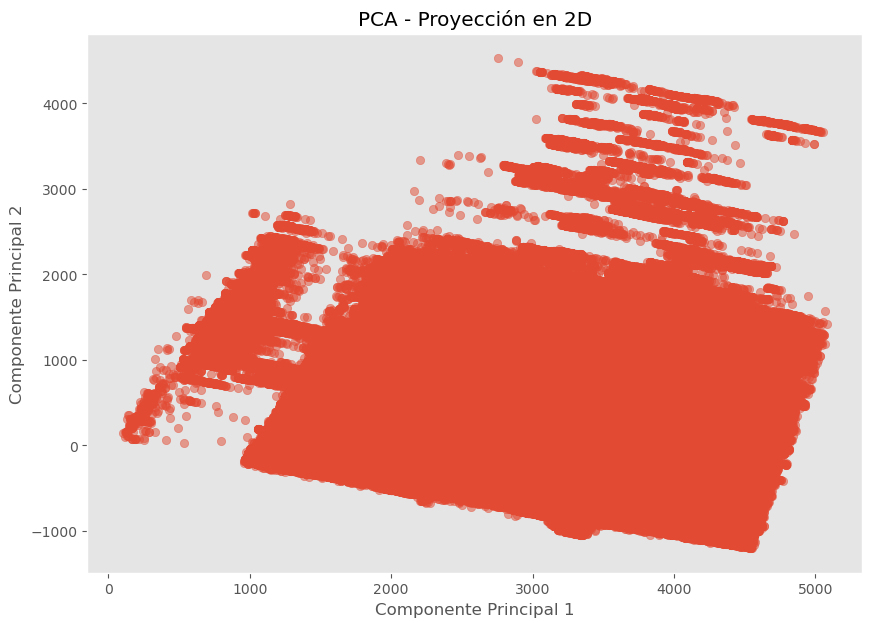

In [122]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - Proyección en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

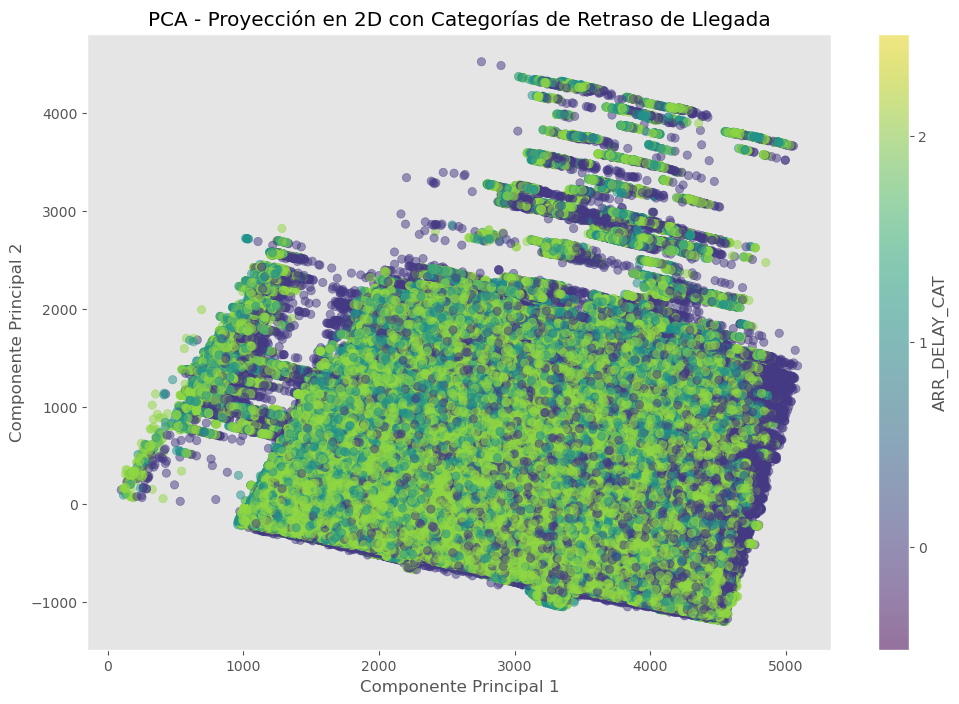

In [123]:
pca_df['ARR_DELAY_CAT'] = airlin_df['ARR_DELAY_CAT'].values[:9000000]  # Asegúrate de que el tamaño coincida

# Visualizar los resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['ARR_DELAY_CAT'].astype('category').cat.codes, alpha=0.5, cmap='viridis')
plt.title('PCA - Proyección en 2D con Categorías de Retraso de Llegada')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='ARR_DELAY_CAT')
plt.clim(-0.5, 2.5)  # Ajusta límites de color
plt.grid()
plt.show()

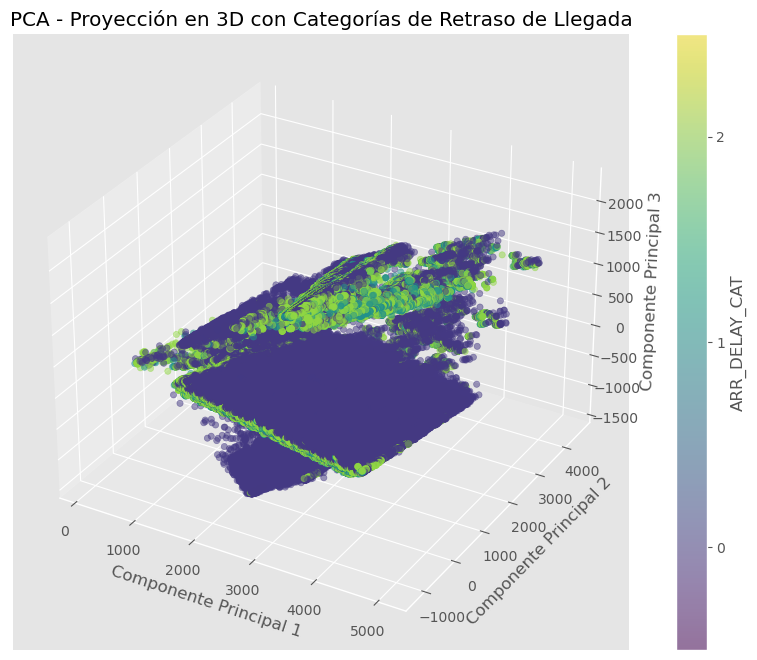

In [128]:
from mpl_toolkits.mplot3d import Axes3D

# Asegúrate de que pca_df tiene 3 componentes principales
pca_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])

# Añadir la columna ARR_DELAY_CAT al DataFrame
pca_df['ARR_DELAY_CAT'] = airlin_df['ARR_DELAY_CAT'].values[:9000000]

# Visualización en 3D con las 3 primeras componentes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión en 3D
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                     c=pca_df['ARR_DELAY_CAT'].astype('category').cat.codes, 
                     cmap='viridis', alpha=0.5)

ax.set_title('PCA - Proyección en 3D con Categorías de Retraso de Llegada')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir barra de color para las categorías
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], label='ARR_DELAY_CAT')

# Ajustar los límites de color usando scatter.set_clim()
scatter.set_clim(-0.5, 2.5)  # Ajusta los límites de color

plt.show()

In [130]:
X = pca_df[['PC1', 'PC2','PC3']]
y = pca_df['ARR_DELAY_CAT'] 

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


              precision    recall  f1-score   support

       Delay       0.78      0.60      0.68    244267
       Early       0.53      0.38      0.44    240510
     On time       0.76      0.88      0.82    865223

    accuracy                           0.74   1350000
   macro avg       0.69      0.62      0.65   1350000
weighted avg       0.73      0.74      0.72   1350000



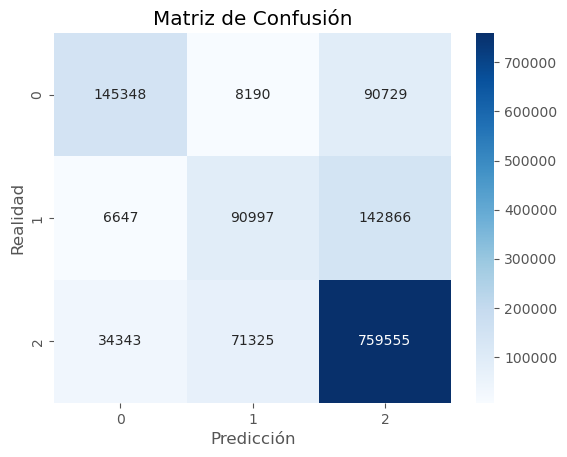

In [134]:
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar un modelo (por ejemplo, Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


El modelo clasifica adecuadamente los vuelos "On time" con un 68% de precisión y un 84% de recall, reflejando su efectividad en esta categoría. Sin embargo, tiene un bajo rendimiento en las clases "Delay" y "Early", con precisiones de 41% y 37%, y recalls de 25% y 23%, respectivamente. Esto sugiere la necesidad de mejoras para detectar mejor los vuelos retrasados y anticipados.

In [5]:
trn_airdt = pd.read_csv('procAirF.csv')
cln_aildf = pd.DataFrame(trn_airdt)
cln_aildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
 14  WEEK_DAY           int64  
 15  ORIGIN_FREQ        float64
 16  DEST_FREQ          float64
 17  OPCARR_FREQ        float64
dtypes: float64(12), int64(2), object(4)
memory usage: 1.2+ GB


# Extracción de carácteristicas

A partir de los rendimientos del modelo random forest realizo extracción de caracteristicas para aplicar nuevamente el modelo

### UMAP
Para todo el conjunto de datos aplicaremos UMAP 

In [39]:
from sklearn.preprocessing import StandardScaler

X = cln_aildf[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 
               'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 
               'DISTANCE', 'WEEK_DAY', 'ORIGIN_FREQ', 'DEST_FREQ', 'OPCARR_FREQ']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sample_size = 2000000  # por ejemplo, 600 mil filas
airlin_df_sample = cln_aildf.sample(n=sample_size, random_state=42)